In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

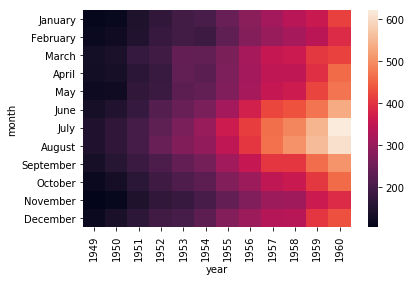

In [2]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

In [3]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [4]:
flights.pivot("month", "year", "passengers")

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [5]:
from scipy.spatial.distance import cdist

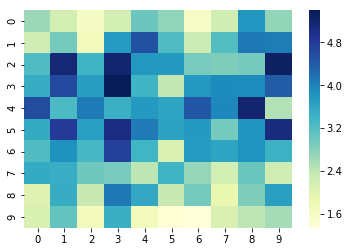

In [10]:
# sns.heatmap(cdist(np.random.randn(10, 5), np.random.randn(10, 5)), cmap=sns.cubehelix_palette(as_cmap=True))
sns.heatmap(cdist(np.random.randn(10, 5), np.random.randn(10, 5)), cmap="YlGnBu")

TODO
# Pre-Grouping of Data

When working in a particular counter-terrorism context, it is natural to ask whether data from completely different circumstances is useful. Why, after all, should we think that terrorist attack data from Nigeria is useful in predicting attacks in the UK? 

In light of this, we will try to divide the dataset into chunks, so that an algorithm which seeks to predict 

1. Grouping by attribute, such as region or weapon type. 

2. Grouping by clustering, after applying a clustering algorithm to the points in $\mathbb{R}^{n}$.

## Affinity Along Attributes

We will first group the data by attribute, and then calculate pairwise distances from the means of each group. For example, there are 12 regions in the dataset. If we divide the 

In [11]:
from preprocess_functions import load_data_relevant_cols, get_dummies

In [13]:
raw = load_data_relevant_cols()

/Users/akhiljalan/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: DtypeWarning: Columns (4,6,8,10,11,12,17,18,24,29,31,33,35,37,38,39,41,43,45,46,47,49,51,53,54,55,57,58,59,60,61,62,63,64,73,76,79,82,84,86,88,90,92,94,96,97,106,108,114,115,121,123,125,126,127,128,129,134) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/akhiljalan/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: DtypeWarning: Columns (6,61,62,63,79,94,96,114,115) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
raw.columns.values

array(['iyear', 'imonth', 'iday', 'country', 'country_txt', 'region',
       'region_txt', 'provstate', 'city', 'latitude', 'longitude',
       'specificity', 'success', 'attacktype1', 'attacktype1_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'natlty1', 'natlty1_txt', 'gname', 'motive', 'weaptype1',
       'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property',
       'propextent', 'propextent_txt', 'propvalue', 'propcomment',
       'ransom', 'ransomamt'], dtype=object)

In [25]:
get_dummies(raw, ['region_txt', 'targtype1_txt', 'weaptype1', 'iyear', 'nkill'])

,region_txt_Australasia & Oceania,region_txt_Central America & Caribbean,region_txt_Central Asia,region_txt_East Asia,region_txt_Eastern Europe,region_txt_Middle East & North Africa,region_txt_North America,region_txt_South America,region_txt_South Asia,region_txt_Southeast Asia,...,nkill_422.0,nkill_433.0,nkill_500.0,nkill_517.0,nkill_518.0,nkill_670.0,nkill_1180.0,nkill_1382.0,nkill_1383.0,nkill_1500.0
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
region_labels = [label for label in dummies.columns.values if 'region_txt_' in label]

In [37]:
means = []
for label in region_labels: 
    means.append(np.mean(dummies[dummies[label] == 1]).drop(index=region_labels))

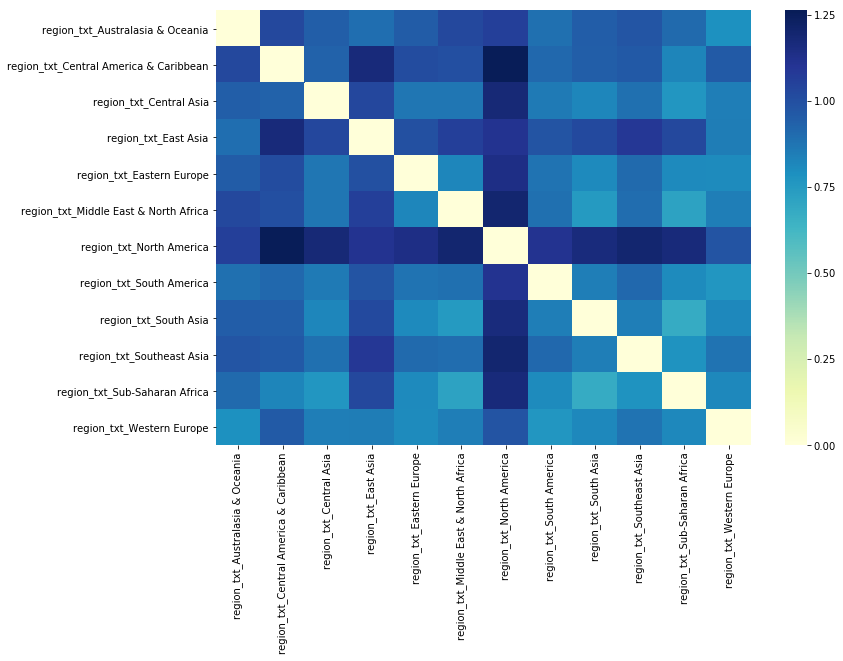

In [40]:
plt.figure(figsize=(12, 8))
sns.heatmap(cdist(means, means), cmap='YlGnBu', xticklabels=region_labels, yticklabels=region_labels)

In [36]:
means[0].drop(index=region_labels)

country_txt_Afghanistan            0.000000
country_txt_Albania                0.000000
country_txt_Algeria                0.000000
country_txt_Andorra                0.000000
country_txt_Angola                 0.000000
country_txt_Antigua and Barbuda    0.000000
country_txt_Argentina              0.000000
country_txt_Armenia                0.000000
country_txt_Australia              0.393939
country_txt_Austria                0.000000
country_txt_Azerbaijan             0.000000
country_txt_Bahamas                0.000000
country_txt_Bahrain                0.000000
country_txt_Bangladesh             0.000000
country_txt_Barbados               0.000000
country_txt_Belarus                0.000000
country_txt_Belgium                0.000000
country_txt_Belize                 0.000000
country_txt_Benin                  0.000000
country_txt_Bhutan                 0.000000
country_txt_Bolivia                0.000000
country_txt_Bosnia-Herzegovina     0.000000
country_txt_Botswana            

In [35]:
type(means[0])

pandas.core.series.Series

In [ ]:
# todo: 
'''1. Preprocess the data so that it scales uniformly. Remember sqrt(2) rule 
2. k-means
3. normal clustering (DB-SCAN because of sparsity?)
4. SVM
5. k-nearest neighbors 
6. sensitivity analysis'''